In [1]:
%matplotlib inline
from IPython.display import display, HTML
from analysis import Analysis
from models import *
analysis = Analysis('weather', title='03-FeaturesDate', logger=display)
analysis.load_data()

D:\Users\fjd10\Anaconda3\envs\tensorflow\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


Now setting the features and predictor to just be the avg temperature value.

In [2]:
predictor = 'actual_mean_temp'
analysis.data['year'] = analysis.data['date'].dt.year
analysis.data['month'] = analysis.data['date'].dt.month
analysis.data['day'] = analysis.data['date'].dt.day
features = ['year', 'month', 'day']
analysis.set_feature_predictor_columns(features, predictor)
analysis.train_test_split()

'Number of train data points: 292'

'Number of test data points: 73'

Set some parameters that are used by some of the models

In [3]:
# The number of days to chunk inputs by
NUM_DAYS = 5

# 
NUM_FEATURES = len(analysis.features)

Going to try each different model.

# Raw Data

Raw Data means that the model simply takes the data as a sequence and no data manipulation is performed.

## ARIMA

Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=1827.791, BIC=1846.175, Fit time=1.776 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 12); AIC=1962.638, BIC=1977.345, Fit time=0.486 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=1864.170, BIC=1878.877, Fit time=1.098 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 1, 12); AIC=1829.085, BIC=1851.146, Fit time=2.065 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 0, 12); AIC=1986.101, BIC=2000.808, Fit time=0.624 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 2, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 2, 12); AIC=1831.230, BIC=1856.967, Fit time=5.920 seconds
Fit ARIMA: order=(2, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=1811.604, BIC=1833.664, Fit time=2.202 seconds
Fit ARIMA: order=(2, 1, 0) seasonal_order=(0, 1, 1, 

'Train Error: 5.07417608657  Num NaN: 0'

'Test Error: 6.38998095112    Num NaN: 0'

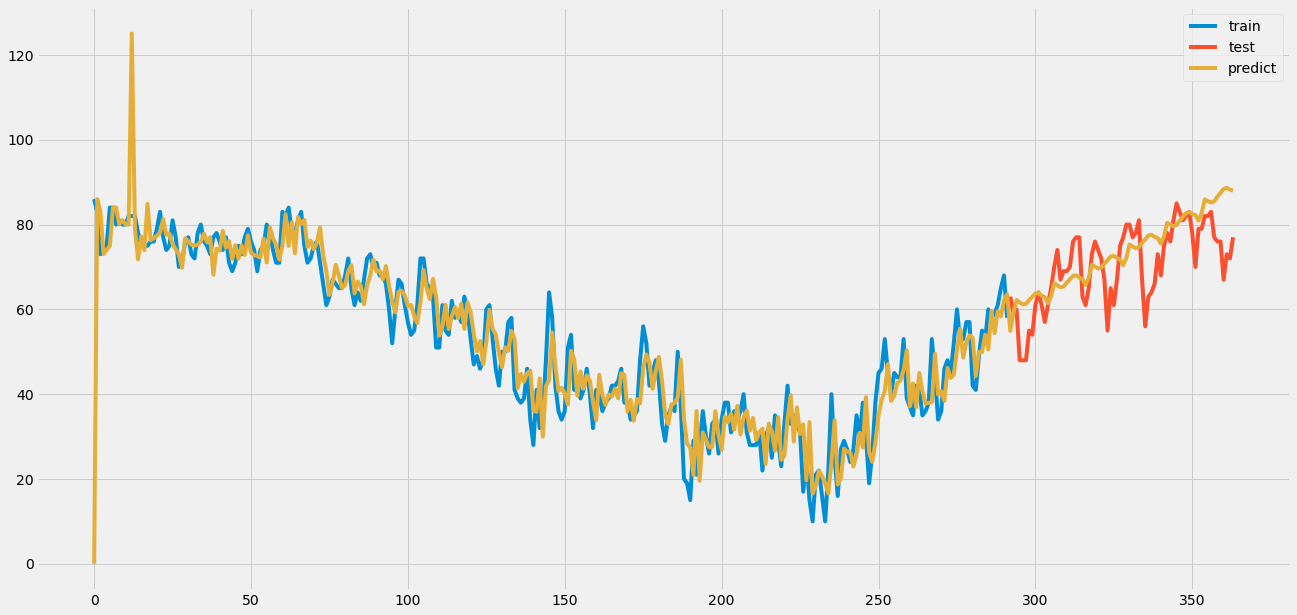

In [4]:
model = ARIMA(analysis, use_features=False)
analysis.run_model(model, name='ARIMA')

'Train Error: 4.17465753425  Num NaN: 0'

'Test Error: 14.0527777778    Num NaN: 0'

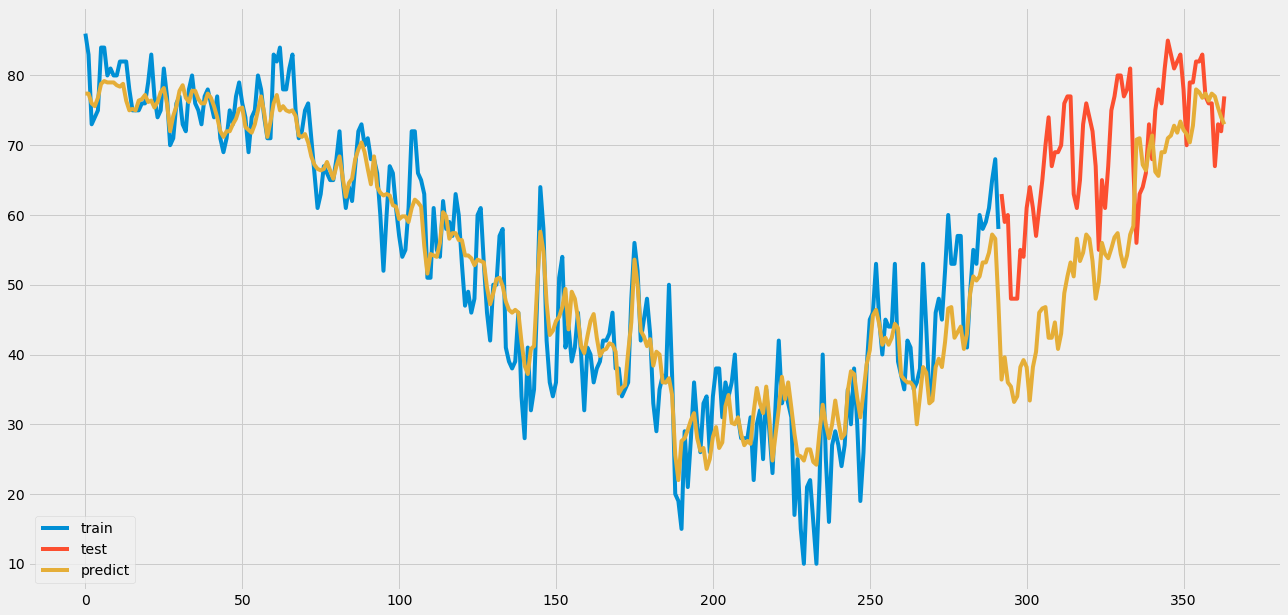

In [5]:
from sklearn.neighbors import KNeighborsRegressor
model = Regressor(analysis, KNeighborsRegressor)
analysis.run_model(model, name='KNN')

D:\Users\fjd10\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


'Train Error: 4.15491666866e+15  Num NaN: 0'

'Test Error: 4.15601074083e+15    Num NaN: 0'

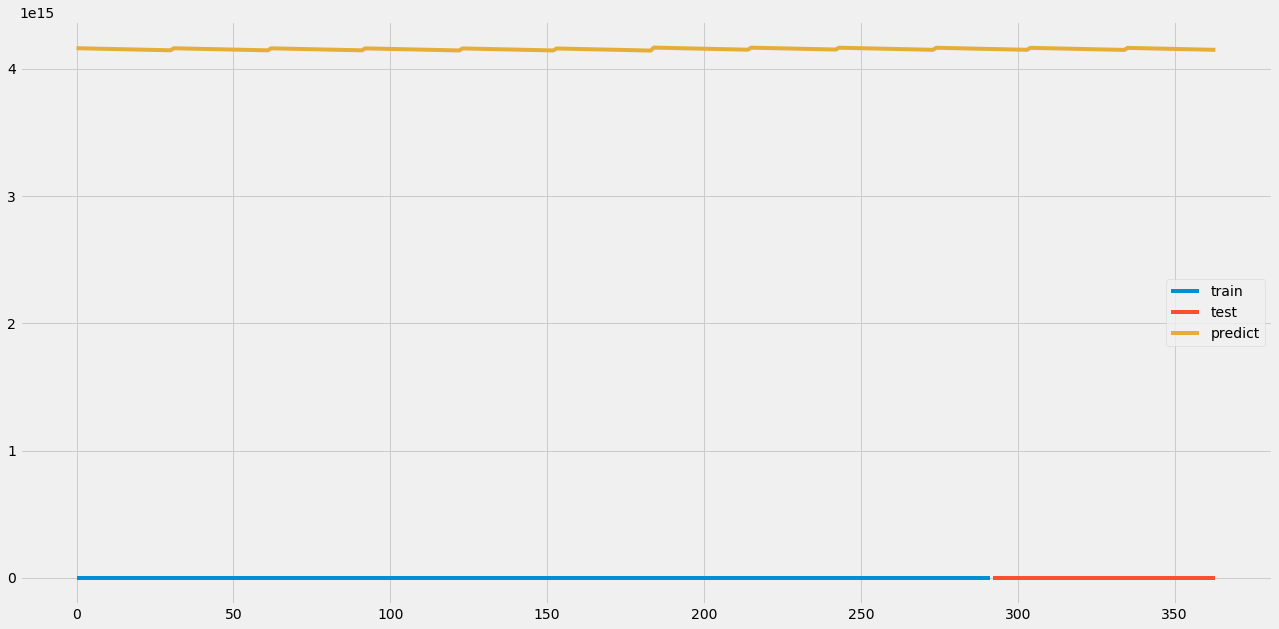

In [6]:
from sklearn.linear_model import SGDRegressor
model = Regressor(analysis, SGDRegressor)
analysis.run_model(model, name='SGD')

'Train Error: 1.70787671233  Num NaN: 0'

'Test Error: 9.51111111111    Num NaN: 0'

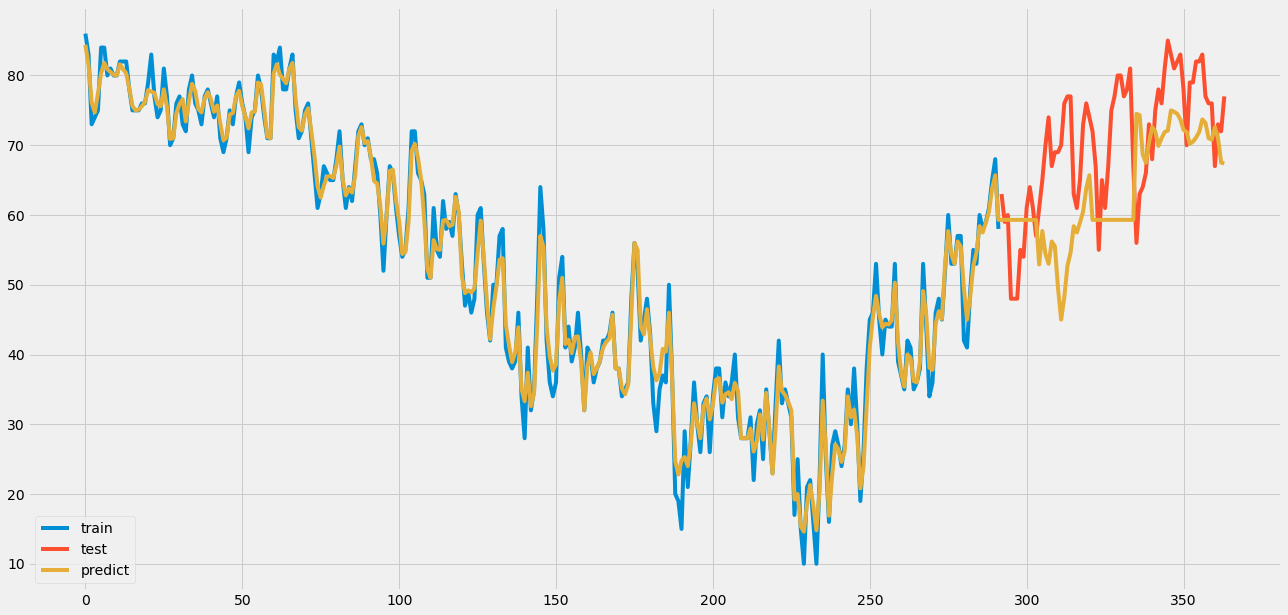

In [7]:
from sklearn.ensemble import RandomForestRegressor
model = Regressor(analysis, RandomForestRegressor)
analysis.run_model(model, name='RandomForest')

'Train Error: 5.61962496356  Num NaN: 0'

'Test Error: 12.0455618274    Num NaN: 0'

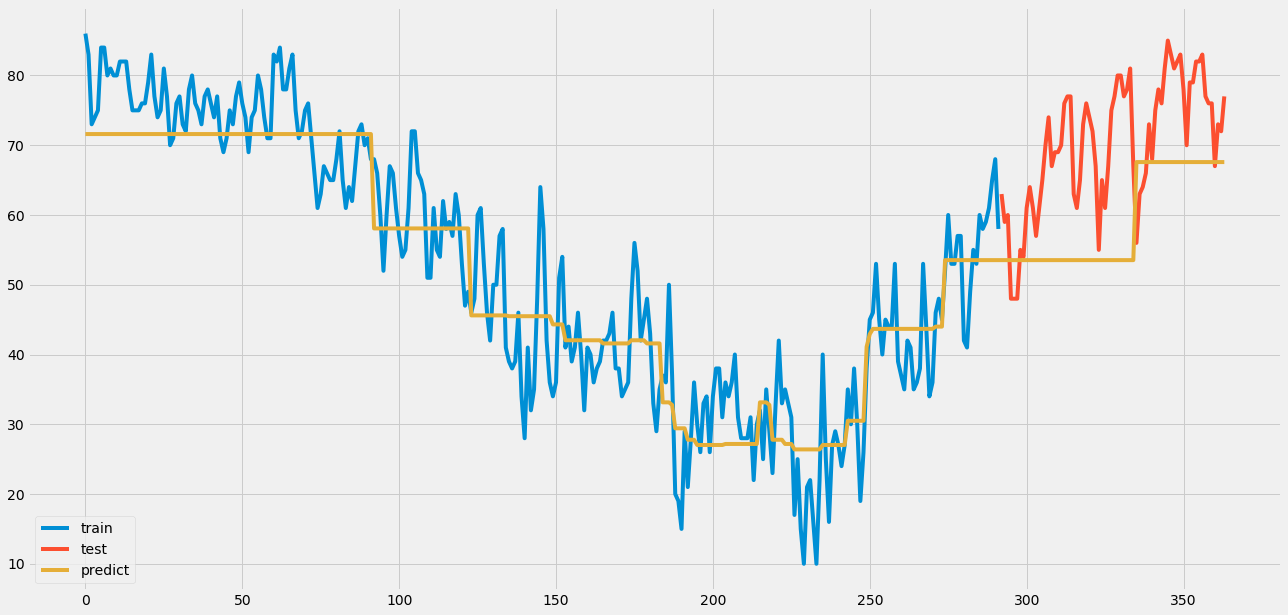

In [8]:
from sklearn.ensemble import AdaBoostRegressor
model = Regressor(analysis, AdaBoostRegressor)
analysis.run_model(model, name='AdaBoost')

'Train Error: 6.03711220437e-09  Num NaN: 0'

'Test Error: 40.8142523091    Num NaN: 0'

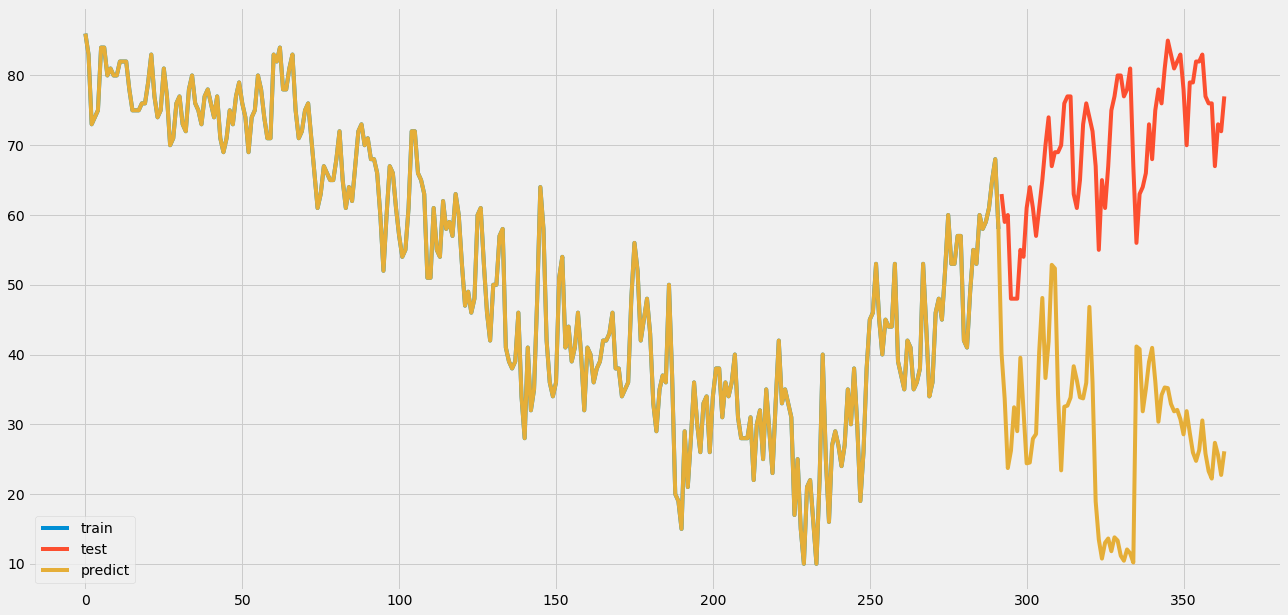

In [9]:
from sklearn.gaussian_process import GaussianProcessRegressor
model = Regressor(analysis, GaussianProcessRegressor)
analysis.run_model(model, name='GaussianProcess')

# Chunking Data

Now going to use models that require chunking.  We perform chunking by taking the time series:

x = (x0, x1, x2, x3, ...)
y = (x1, x2, x3, x4, ...)

and modifying it such that if the chunk parameter, c, is set to 3:

x = ((x0, x1, x2), (x1, x2, x3), (x2, x3, x4), ...)
y = (x3, x4, x5, ...)

This results in the first c values in not having a prediction and thus (Num NaN is > 0 and == c).



## LinearRegression

'Train Error: 9.28226042825  Num NaN: 5'

'Test Error: 50.7158892471    Num NaN: 5'

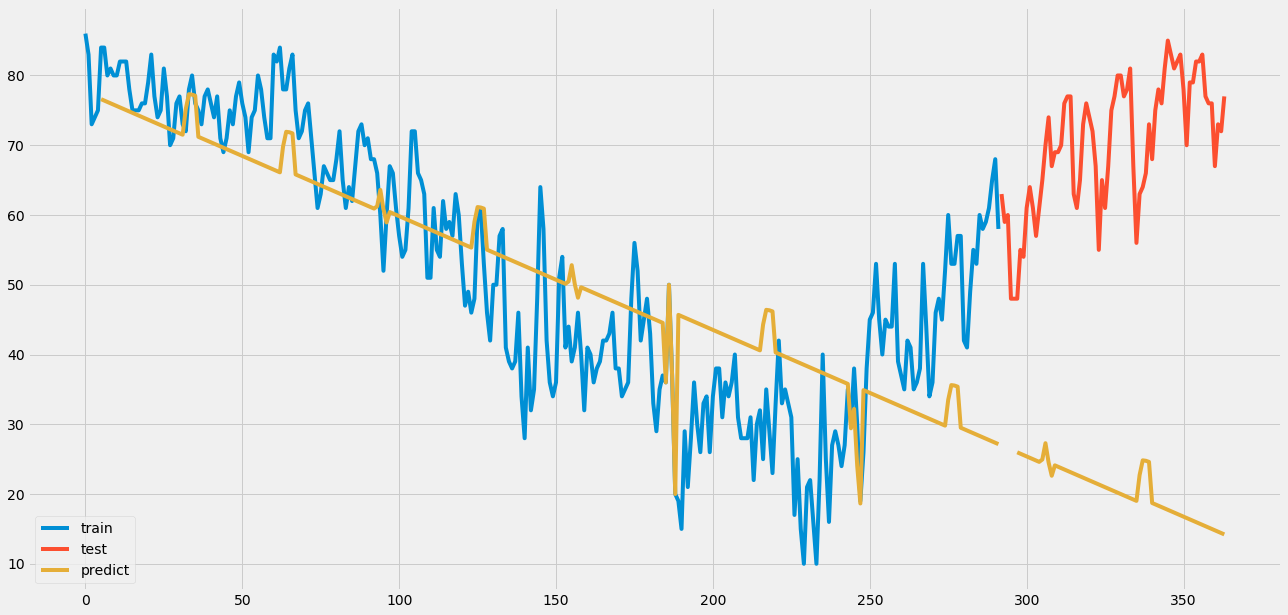

In [10]:
model = LinearRegression(analysis, num_days=NUM_DAYS)
analysis.run_model(model, name='LinearRegression')

## FeedForward Neural Network

Using TensorFlow backend.


Train on 287 samples, validate on 67 samples
Epoch 1/10
 - 1s - loss: 0.2227 - val_loss: 0.3345
Epoch 2/10
 - 0s - loss: 0.2230 - val_loss: 0.2417
Epoch 3/10
 - 0s - loss: 0.2180 - val_loss: 0.2231
Epoch 4/10
 - 0s - loss: 0.2194 - val_loss: 0.3151
Epoch 5/10
 - 0s - loss: 0.2210 - val_loss: 0.2590
Epoch 6/10
 - 0s - loss: 0.2221 - val_loss: 0.2063
Epoch 7/10
 - 0s - loss: 0.2233 - val_loss: 0.2682
Epoch 8/10
 - 0s - loss: 0.2251 - val_loss: 0.2980
Epoch 9/10
 - 0s - loss: 0.2257 - val_loss: 0.2924
Epoch 10/10
 - 0s - loss: 0.2234 - val_loss: 0.2449


'Train Error: 16.4872922332  Num NaN: 5'

'Test Error: 18.3698882487    Num NaN: 5'

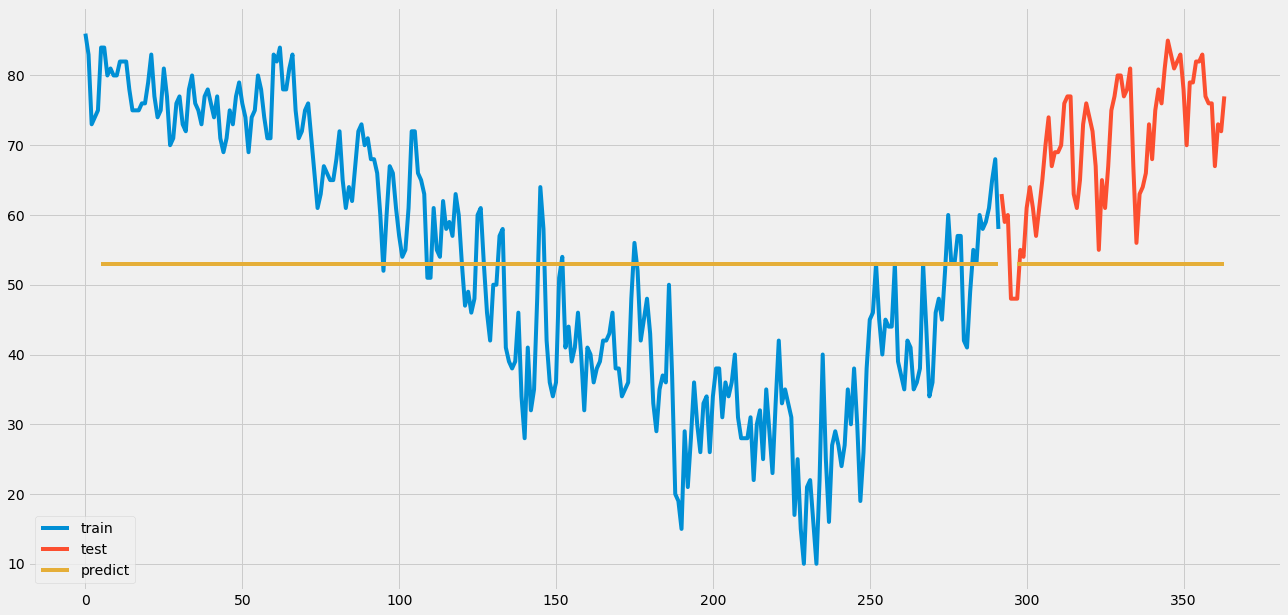

In [11]:
from keras.models import Sequential
from keras import optimizers
from keras import layers

nn = Sequential()
nn.add(layers.Dense(25, activation='tanh',
                    batch_input_shape=(None, NUM_DAYS * NUM_FEATURES)))
nn.add(layers.Dense(10, activation='tanh'))
nn.add(layers.Dense(1, activation='tanh'))
nn.compile(loss='mae', optimizer='sgd')

model = FNN(analysis, nn, num_days=NUM_DAYS)
analysis.run_model(model, name='FNN')


## Recurrent Neural Network with Single Output

Single output means that the chunked timesteps are input and then the final output of the RNN is used as the prediction.

Train on 287 samples, validate on 67 samples
Epoch 1/10
 - 1s - loss: 0.2474 - val_loss: 0.5325
Epoch 2/10
 - 0s - loss: 0.2379 - val_loss: 0.2095
Epoch 3/10
 - 0s - loss: 0.2373 - val_loss: 0.0951
Epoch 4/10
 - 0s - loss: 0.2498 - val_loss: 0.2486
Epoch 5/10
 - 0s - loss: 0.2328 - val_loss: 0.5025
Epoch 6/10
 - 0s - loss: 0.2412 - val_loss: 0.0979
Epoch 7/10
 - 0s - loss: 0.2400 - val_loss: 0.0960
Epoch 8/10
 - 0s - loss: 0.2337 - val_loss: 0.0973
Epoch 9/10
 - 0s - loss: 0.2437 - val_loss: 0.2024
Epoch 10/10
 - 0s - loss: 0.2410 - val_loss: 0.2198


'Train Error: 16.6804354332  Num NaN: 5'

'Test Error: 16.4857550664    Num NaN: 5'

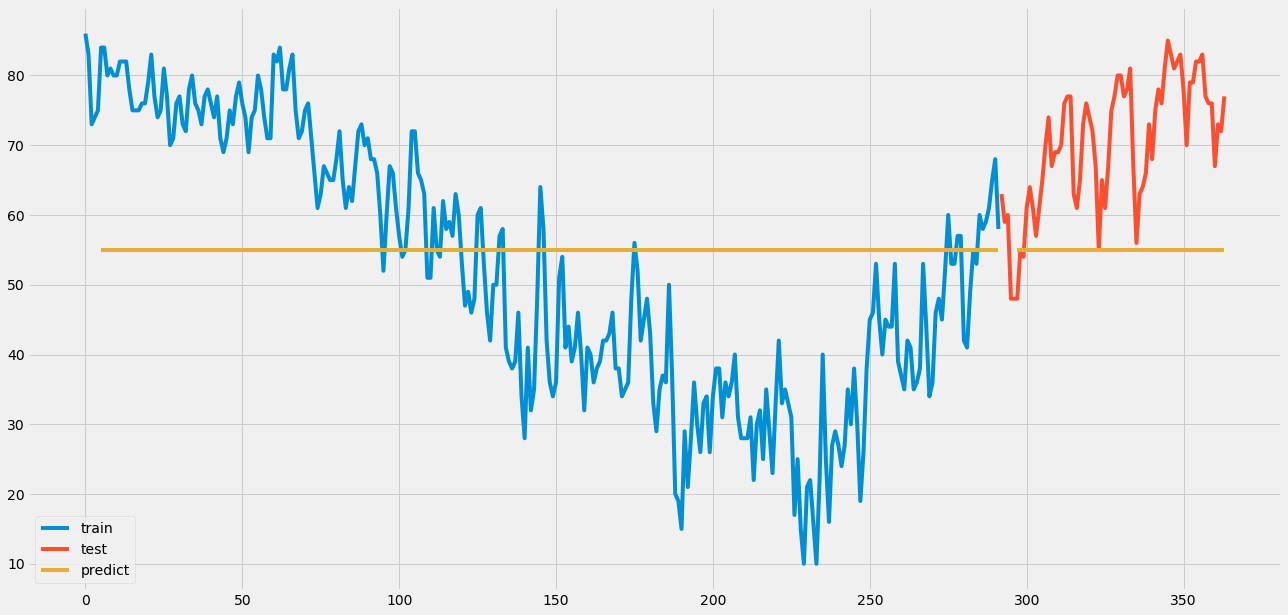

In [12]:
from keras.models import Sequential
from keras import optimizers
from keras import layers

mask_value = -9999

nn = Sequential()
nn.add(layers.Masking(mask_value=mask_value, input_shape=(NUM_DAYS, NUM_FEATURES)))
nn.add(layers.SimpleRNN(50, input_shape=(NUM_DAYS, NUM_FEATURES)))

nn.add(layers.Dense(1, activation='tanh'))
nn.add(layers.Dense(1, activation='linear'))
nn.compile(loss='mae', optimizer=optimizers.RMSprop(lr=0.1))
        
model = RNNSingle(analysis, nn, num_days=NUM_DAYS, mask_value=mask_value)
analysis.run_model(model, name='RNNSingle')

## Recurrent Neural Network with Multiple Outputs

Multiple outputs means that the chunked data is input and the output at each timestep is used.

Train on 59 samples, validate on 15 samples
Epoch 1/10
 - 1s - loss: 0.8425 - val_loss: 0.6788
Epoch 2/10
 - 0s - loss: 0.6338 - val_loss: 0.5796
Epoch 3/10
 - 0s - loss: 0.5448 - val_loss: 0.5028
Epoch 4/10
 - 0s - loss: 0.4731 - val_loss: 0.4371
Epoch 5/10
 - 0s - loss: 0.4107 - val_loss: 0.3793
Epoch 6/10
 - 0s - loss: 0.3557 - val_loss: 0.3282
Epoch 7/10
 - 0s - loss: 0.3071 - val_loss: 0.2832
Epoch 8/10
 - 0s - loss: 0.2643 - val_loss: 0.2435
Epoch 9/10
 - 0s - loss: 0.2267 - val_loss: 0.2088
Epoch 10/10
 - 0s - loss: 0.1939 - val_loss: 0.1785


'Train Error: 1778.63016374  Num NaN: 0'

'Test Error: 1799.70073785    Num NaN: 0'

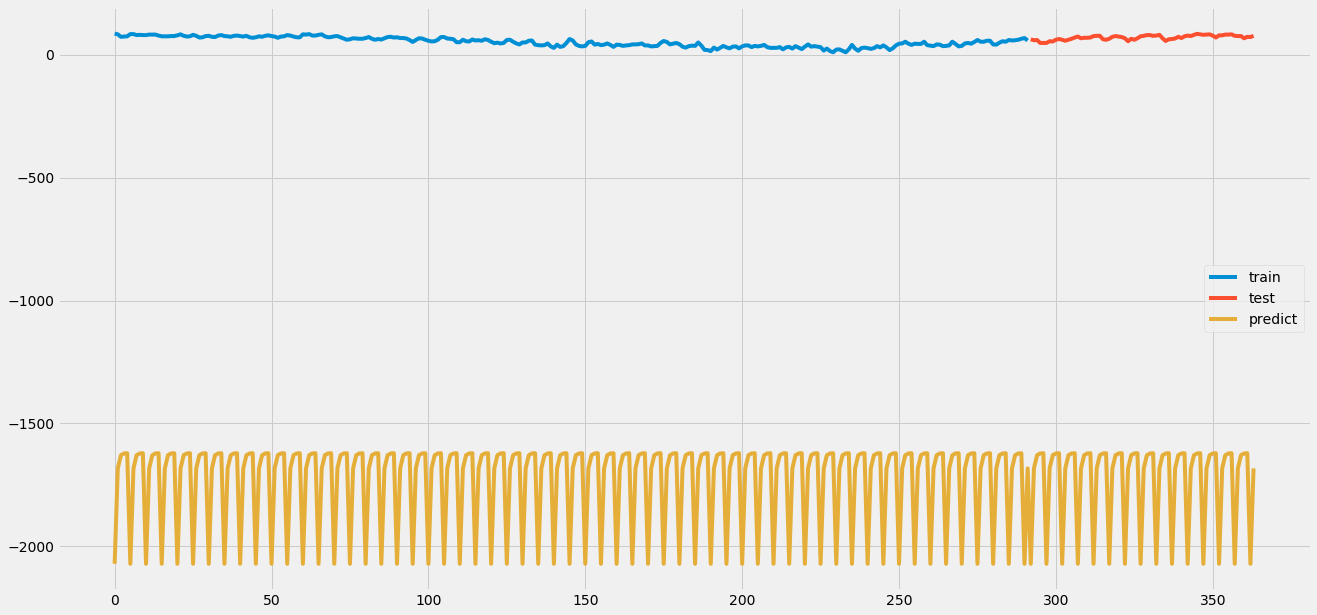

In [13]:
from keras.models import Sequential
from keras import optimizers
from keras import layers

mask_value = -9999

nn = Sequential()
nn.add(layers.Masking(mask_value=mask_value, input_shape=(NUM_DAYS, NUM_FEATURES)))
nn.add(layers.LSTM(50, activation='tanh', input_shape=(NUM_DAYS, NUM_FEATURES), return_sequences=True))

nn.add(layers.TimeDistributed(layers.Dense(10, activation='relu')))
nn.add(layers.TimeDistributed(layers.Dense(1, activation='tanh')))
# nn.add(layers.TimeDistributed(layers.Dense(1, activation='linear')))
nn.compile(loss='mae', optimizer='rmsprop')

model = RNNMultiple(analysis, nn, num_days=NUM_DAYS, mask_value=mask_value)
analysis.run_model(model, name='RNNMultiple')

## Recurrent Neural Network Complete Sequence

Complete sequence means that the entire sequence is input into the network and each timestep produces an output.  There are no batches, just one long sequence.

D:\Users\fjd10\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


Train on 1 samples, validate on 1 samples
Epoch 1/10
 - 2s - loss: 1.2426 - val_loss: 1.1750
Epoch 2/10
 - 1s - loss: 1.1735 - val_loss: 1.1444
Epoch 3/10
 - 1s - loss: 1.1428 - val_loss: 1.1185
Epoch 4/10
 - 1s - loss: 1.1169 - val_loss: 1.0952
Epoch 5/10
 - 1s - loss: 1.0936 - val_loss: 1.0737
Epoch 6/10
 - 1s - loss: 1.0720 - val_loss: 1.0534
Epoch 7/10
 - 1s - loss: 1.0517 - val_loss: 1.0340
Epoch 8/10
 - 1s - loss: 1.0323 - val_loss: 1.0154
Epoch 9/10
 - 1s - loss: 1.0136 - val_loss: 0.9973
Epoch 10/10
 - 1s - loss: 0.9955 - val_loss: 0.9798


'Train Error: 9862.89182898  Num NaN: 0'

'Test Error: 9881.09884983    Num NaN: 0'

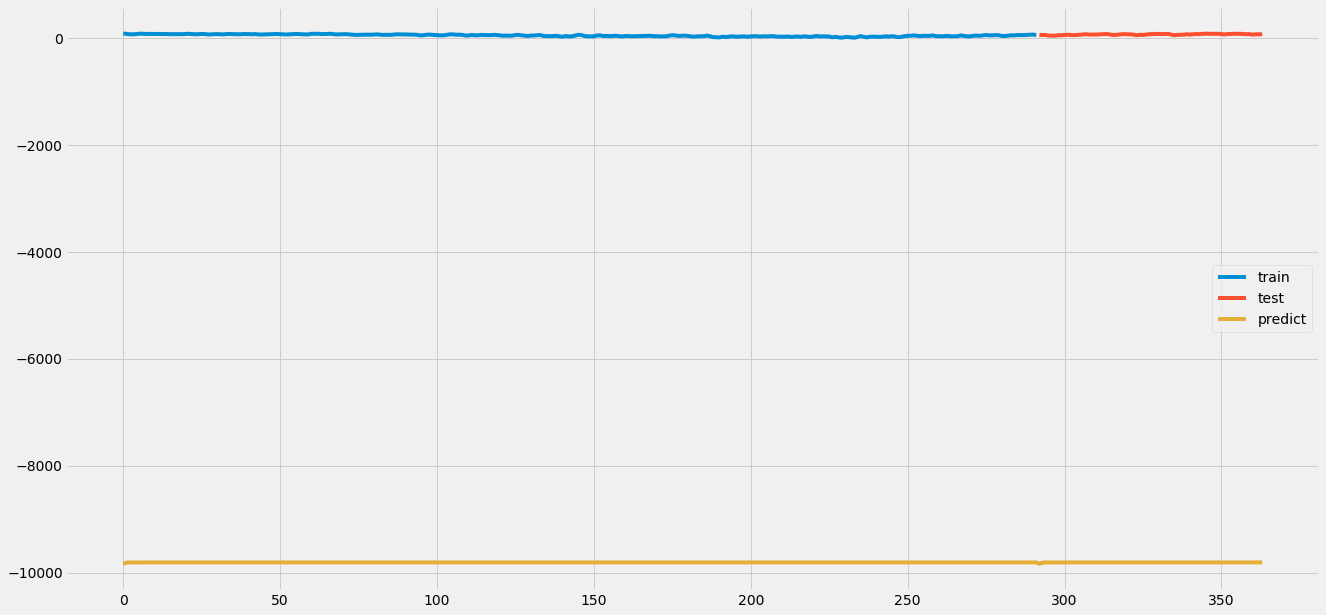

In [14]:
from keras.models import Sequential
from keras import optimizers
from keras import layers

mask_value = -9999

nn = Sequential()
nn.add(layers.Masking(mask_value=mask_value, input_shape=(len(analysis.x_train), NUM_FEATURES)))
nn.add(layers.LSTM(50, activation='tanh', input_shape=(len(analysis.x_train), NUM_FEATURES), return_sequences=True))

nn.add(layers.TimeDistributed(layers.Dense(10, activation='relu')))
nn.add(layers.TimeDistributed(layers.Dense(1, activation='tanh')))
# nn.add(layers.TimeDistributed(layers.Dense(1, activation='linear')))
nn.compile(loss='mae', optimizer='rmsprop')

model = RNNAll(analysis, nn, mask_value=mask_value)
analysis.run_model(model, name='RNNAll')